<a href="https://colab.research.google.com/github/Jitha50/Ensemble_Technique_on_Talking_Dataset/blob/main/Bagging_boosting_With_talking_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import zscore

In [ ]:
df = pd.read_csv('/content/talking_data.csv')

In [ ]:
df.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
5,93663,3,1,17,115,2017-11-09 01:22:13,NaN,0
6,17059,1,1,17,135,2017-11-09 01:17:58,NaN,0
7,121505,9,1,25,442,2017-11-07 10:01:53,NaN,0
8,192967,2,2,22,364,2017-11-08 09:35:17,NaN,0
9,143636,3,1,19,135,2017-11-08 12:35:26,NaN,0


In [ ]:
df.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [ ]:
# we have to find the information about the dataset
# we have to use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [ ]:
max(len(df['ip'].unique()), len(df['is_attributed'].unique()), len(df['attributed_time'].unique()),len(df['click_time'].unique()),
len(df['channel'].unique()),len(df['os'].unique()), len(df['device'].unique()), len(df['app'].unique()))

80350

In [ ]:
diff = 100000 - 80350
print(diff)

19650


In [ ]:
df.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

1. There's 2 qualitative columns
2. There's 99773 missing values inside attributed_time

#### Drop all unuseful datas

In [ ]:
df['app'].mean()*0.2

2.409576

In [ ]:
df['app'][df['app'] <2.4]
 # the dataset having values less than 2.4

6        1
8        2
14       2
16       2
27       1
        ..
99946    1
99953    2
99973    2
99986    2
99991    1
Name: app, Length: 14872, dtype: int64

In [ ]:
# the dataset having values more than 2.4
df = df[df['app']>2.4]
df

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0
...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,2017-11-09 13:25:41,NaN,0
99996,85150,9,1,13,244,2017-11-07 11:25:43,NaN,0
99997,18839,3,1,13,19,2017-11-08 11:38:42,NaN,0
99998,114276,15,1,12,245,2017-11-08 17:55:21,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               85128 non-null  int64 
 1   app              85128 non-null  int64 
 2   device           85128 non-null  int64 
 3   os               85128 non-null  int64 
 4   channel          85128 non-null  int64 
 5   click_time       85128 non-null  object
 6   attributed_time  227 non-null    object
 7   is_attributed    85128 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 5.8+ MB


#### Missing Values Treatment

In [ ]:
# Since there's too many data missing in the Attributed_time, the column will be dropped
df.drop(columns=['attributed_time'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ip             85128 non-null  int64 
 1   app            85128 non-null  int64 
 2   device         85128 non-null  int64 
 3   os             85128 non-null  int64 
 4   channel        85128 non-null  int64 
 5   click_time     85128 non-null  object
 6   is_attributed  85128 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 5.2+ MB


In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed'], dtype='object')

#### Date times

In [ ]:
# We have to convert our date time column to original dte time format
df['click_time'] = pd.to_datetime(df['click_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ip             85128 non-null  int64         
 1   app            85128 non-null  int64         
 2   device         85128 non-null  int64         
 3   os             85128 non-null  int64         
 4   channel        85128 non-null  int64         
 5   click_time     85128 non-null  datetime64[ns]
 6   is_attributed  85128 non-null  int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 5.2 MB


In [ ]:
# we will take out the required infiormation from our data and store it to some other format like, week, year
df['week'] = df['click_time'].dt.dayofweek

In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'week'],
      dtype='object')

In [ ]:
df['year'] = df['click_time'].dt.dayofyear

In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'week', 'year'],
      dtype='object')

In [ ]:
df['month'] = df['click_time'].dt.month

In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'week', 'year', 'month'],
      dtype='object')

In [ ]:
df['hour'] = df['click_time'].dt.hour

In [ ]:
df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'is_attributed',
       'week', 'year', 'month', 'hour'],
      dtype='object')

In [ ]:
# we extracted all the informations from our dataset now we can drop our click_time column
df.drop(columns =['click_time'], axis = 1, inplace = True)

In [ ]:
df.head(10)

,ip,app,device,os,channel,is_attributed,week,year,month,hour
0,87540,12,1,13,497,0,1,311,11,9
1,105560,25,1,17,259,0,1,311,11,13
2,101424,12,1,19,212,0,1,311,11,18
3,94584,13,1,13,477,0,1,311,11,4
4,68413,12,1,1,178,0,3,313,11,9
5,93663,3,1,17,115,0,3,313,11,1
7,121505,9,1,25,442,0,1,311,11,10
9,143636,3,1,19,135,0,2,312,11,12
10,73839,3,1,22,489,0,2,312,11,8
11,34812,3,1,13,489,0,1,311,11,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85128 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   ip             85128 non-null  int64
 1   app            85128 non-null  int64
 2   device         85128 non-null  int64
 3   os             85128 non-null  int64
 4   channel        85128 non-null  int64
 5   is_attributed  85128 non-null  int64
 6   week           85128 non-null  int64
 7   year           85128 non-null  int64
 8   month          85128 non-null  int64
 9   hour           85128 non-null  int64
dtypes: int64(10)
memory usage: 7.1 MB


### We have to split our independent and dependent values

In [ ]:
X = df.drop(['is_attributed'],axis = 1)
X

,ip,app,device,os,channel,week,year,month,hour
0,87540,12,1,13,497,1,311,11,9
1,105560,25,1,17,259,1,311,11,13
2,101424,12,1,19,212,1,311,11,18
3,94584,13,1,13,477,1,311,11,4
4,68413,12,1,1,178,3,313,11,9
...,...,...,...,...,...,...,...,...,...
99995,124883,11,1,19,122,3,313,11,13
99996,85150,9,1,13,244,1,311,11,11
99997,18839,3,1,13,19,2,312,11,11
99998,114276,15,1,12,245,2,312,11,17


In [36]:
# Tell me about Bagging(It reduces the varaince but not the bais) and Boosting (it redues the bias but nor varaince) -> 
y = df['is_attributed']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: is_attributed, Length: 85128, dtype: int64

##### Train test Split method

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

#### TRAIN THE CLASSIFICATION TREE

In [38]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier(max_depth=3, criterion = 'gini') 

In [39]:
# we will fit our model on our train data
model_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

#### Predict values using train model

In [41]:
y_train_pred = model_1.predict(x_train)
y_train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
y_test_pred = model_1.predict(x_test)

In [44]:
y_test_pred

array([0, 0, 0, ..., 0, 0, 0])

#### We will check our model performance

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [47]:
confusion_matrix(y_train,y_train_pred)

array([[67911,     0],
       [  191,     0]])

In [48]:
confusion_matrix(y_test,y_test_pred)

array([[16990,     0],
       [   36,     0]])

In [49]:
# what is accuracy of the dataset
accuracy_score(y_test,y_test_pred)
# approximately 100% accuracy we are getting from decision tree classifier model


0.997885586749677

#### Plotting Decision Tree

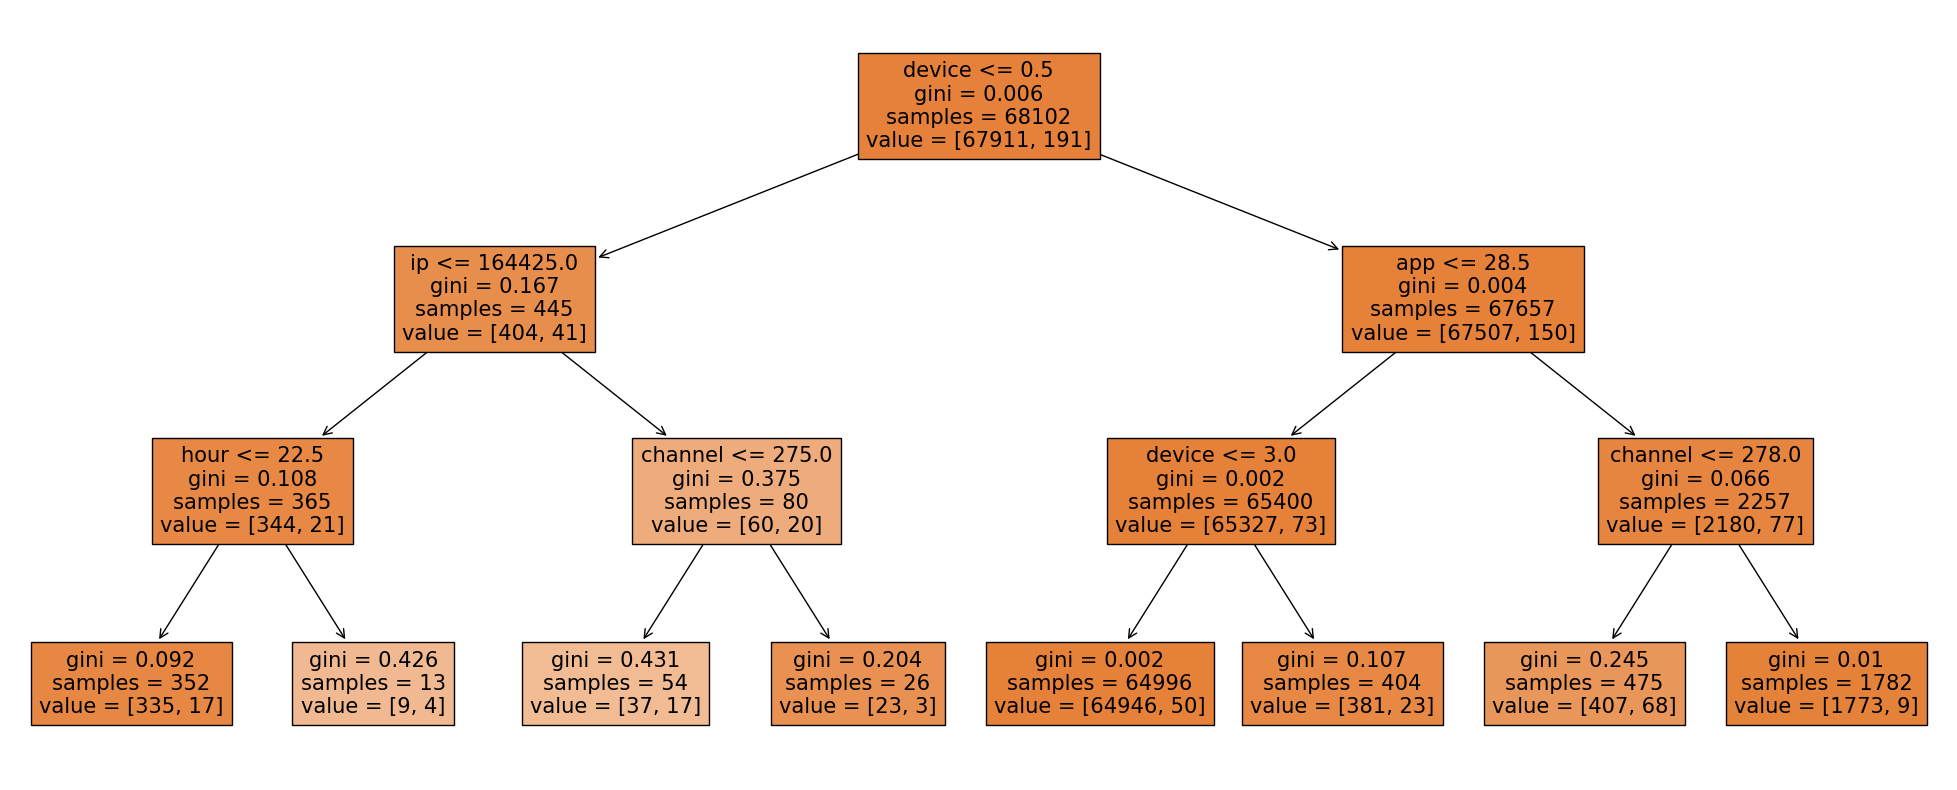

In [53]:
from sklearn import tree
plt.figure(figsize = (25,10))
tree.plot_tree(model_1, feature_names = x_train.columns, max_depth=3, filled = True)
plt.show()

In [ ]:
# We will apply other models on this dataset
# We will apply XG Boosting

In [54]:
import xgboost as xgb

In [55]:
from pandas.core.common import random_state
xgb_clf = xgb.XGBClassifier(max_depth = 5, n_estimators = 100, learning_rate = 0.3, random_state = 42)

In [56]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [57]:
accuracy_score(y_test,xgb_clf.predict(x_test))

0.9981205215552684

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

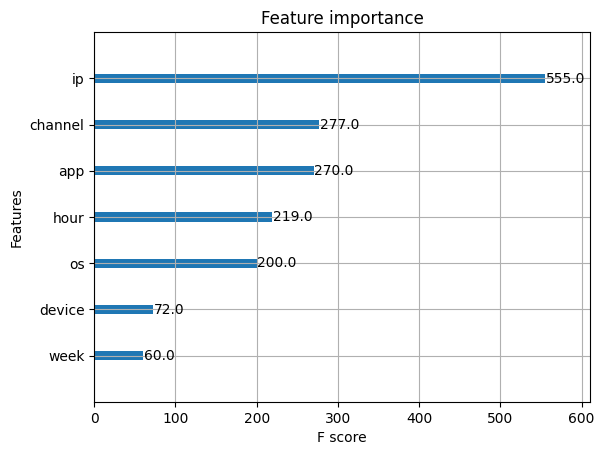

In [58]:
# we will plot an importance graph this graph tells us about whihc column is contributing more to find the accuracy of our model
xgb.plot_importance(xgb_clf)

#### Bagging Technique


In [59]:
from sklearn.ensemble import BaggingClassifier

In [62]:
bag_clf = BaggingClassifier(base_estimator = model_1, n_estimators = 100, bootstrap = True, random_state = 42)

In [63]:
bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=100, random_state=42)

In [65]:
confusion_matrix(y_test,bag_clf.predict(x_test))

array([[16990,     0],
       [   36,     0]])

In [67]:
accuracy_score(y_test,bag_clf.predict(x_test))

0.997885586749677